<a href="https://colab.research.google.com/github/qu4nt/PandasVsExcel/blob/main/S07_reporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Elementos gráficos y tabulares de un reporte con pandas

## Reporte: Ventas de videojuegos

El conjunto de datos que vamos a utilizar está disponible en [kaggle](https://www.kaggle.com/code/juanpoma/estudio-de-base-de-datos-sobre-videojuegos/data?scriptVersionId=58478349&select=vgsales.csv), contiene una lista de videojuegos con ventas superiores a 100.000 copias. Se generó mediante un scrape de vgchartz.com. En este archivo hay 16598 observaciones.

Los campos incluyen

* _Rank_ - Clasificación de las ventas totales

* _Name_ - El nombre del juego

* _Platform_ - Plataforma de lanzamiento del juego (es decir, PC, PS4, etc.)

* _Year_ - Año de lanzamiento del juego

* _Genre_ - Género del juego

* _Publisher_ - Editor del juego

* _NA_Sales_ - Ventas en Norteamérica (en millones)

* _EU_Sales_ - Ventas en Europa (en millones)

* _JP_Sales_ - Ventas en Japón (en millones)

* _Other_Sales_ - Ventas en el resto del mundo (en millones)

* _Global_Sales_ - Ventas totales en todo el mundo.

Antes de realizar cualquier reporte debemos tener claro lo que necesitamos expresar.

En este caso queremos conocer cómo han sido las ventas de videojuegos a lo largo de los años, qué región ha vendido más, qué género y editor tiene mayor cantidad de ventas. Luego estudiar un poco más sobre el editor con más ventas.

## Lectura y limpieza de datos

Vamos a revisar nuestros datos y cambiar los valores que sean necesarios. Comencemos por importar las bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np

Ahora, vamos a leer nuestros datos

In [3]:
df = pd.read_csv('/content/drive/MyDrive/vgsales.csv')

Los valores en las primeras filas

In [7]:
df.head().style

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.000000,Sports,Nintendo,41.490000,29.020000,3.770000,8.460000,82.740000
1,2,Super Mario Bros.,NES,1985.000000,Platform,Nintendo,29.080000,3.580000,6.810000,0.770000,40.240000
2,3,Mario Kart Wii,Wii,2008.000000,Racing,Nintendo,15.850000,12.880000,3.790000,3.310000,35.820000
3,4,Wii Sports Resort,Wii,2009.000000,Sports,Nintendo,15.750000,11.010000,3.280000,2.960000,33.000000
4,5,Pokemon Red/Pokemon Blue,GB,1996.000000,Role-Playing,Nintendo,11.270000,8.890000,10.220000,1.000000,31.370000


Las últimas filas

In [ ]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


Las columnas almacenadas

In [ ]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Un resumen sobre nuestro DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Podemos observar aquí que tenemos 11 columnas, 16598 filas (observaciones), ocupa 1.4 MB de la memoria, hay 6 columnas de tipo números flotantes, 1 de enteros y 4 de tipo object. De donde podemos decir que es necesario convertir las variables *Platform*, *Genre* y *Publisher* en tipo `category` porque cada columna tiene una determinada lista de valores o categorías. Así mismo *Year* debería ser de tipo datetime.

Además, podemos notar que Publisher y Year tienen valores faltantes. En este caso, tomaremos la decisión de excluir estos datos en el estudio.

Para eliminar los faltantes utilizaremos dropna

In [ ]:
df = df.dropna()

En el caso de convertir nuestras columnas a `category` utilizaremos `astype`

In [15]:
df[['Platform', 'Genre', 'Publisher']] = df[['Platform', 'Genre',
                                             'Publisher']].astype('category')

Para convertir los años a valores de tipo datetime vamos a utilizar `to_datetime`, pero debemos pasarle a la función que nuestra fecha viene en formato `%Y`. Este formato nos va a permitir que la función ajuste los años a una fecha de forma correcta, porque si no se tomará como un punto de tiempo en segundos.

In [ ]:
df['Year']= pd.to_datetime(df.Year, format="%Y")

In [ ]:
df.dtypes

Rank                     int64
Name                    object
Platform              category
Year            datetime64[ns]
Genre                 category
Publisher             category
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

Ahora, ya tenemos los tipos de datos correctos. Además, en el resumen del DataFrame, que nos muestra info, observamos que no existen valores faltantes.

## Cálculo de estadísticas básicas

Estos cálculos los haremos con la función `describe`.

Para las variables numéricas tenemos

In [8]:
df.describe().style

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


La cantidad de ventas promedio en millones son mayores para Norteamérica indicando que este país es una de las principales fuentes de ingresos para esta industria, sus ventas varian entre 0 y un poco más de 41 millones.

Mientras que las ventas con el valor más pequeño de los máximos corresponde a las ventas en Japón.

Podemos ver los datos de las ventas con un poco más de detenimiento al gráficarlos en un diagrama de caja

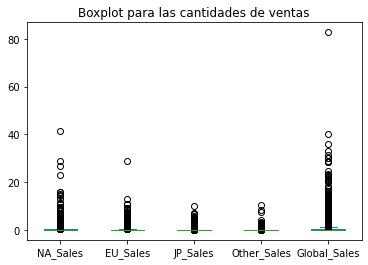

In [10]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales',
    'Other_Sales', 'Global_Sales']].plot(kind='box',
                                         title='Boxplot para las cantidades de ventas');

Podemos notar que existen datos fuera de lo común, atípicos. (Si deseas conocer más sobre esto, te invito a inscribirte en nuestro [curso](https://drive.google.com/drive/folders/1WsKFzOggXbjBpkKow3tL5n0CJ9b71vMr)*Curso Yurely*)


Podemos determinar en qué observación se encuentra. Por ejemplo, para Global Sales, el valor fuera de lo común es para Wii Sports, un juego lanzado el 19 de noviembre de 2006

In [11]:
df.iloc[df.Global_Sales.idxmax()]

Rank                     1
Name            Wii Sports
Platform               Wii
Year                2006.0
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object

Aquí estamos utilizando la función idxmax que devuelve la posición del máximo de los datos seleccionados, este valor lo pasamos al método `iloc` y obtenemos una serie que muestra el nombre de las columnas con los respectivos valores para la posición correspondiente.

Continuemos con las estadísticas para nuestros datos categóricos.

In [16]:
df.describe(include='category').style

,Platform,Genre,Publisher
count,16598,16598,16540
unique,31,12,578
top,DS,Action,Electronic Arts
freq,2163,3316,1351


Tenemos que existen 31 plataformas, 12 géneros y 576 editores para los videojuegos.

Ahora veamos la cantidad de videojuegos por género. Haremos una agrupación de valores por Género, le aplicaremos la función de conteo y veremos la cantidad de nombres.

## Cantidad de videojuegos por género

In [17]:
num_genero = df.groupby('Genre').count()[['Name']]
num_genero = num_genero.rename(columns={'Name':'Count'})
num_genero.style

,Count
Genre,
Action,3316
Adventure,1286
Fighting,848
Misc,1739
Platform,886
Puzzle,582
Racing,1249
Role-Playing,1488
Shooter,1310


Podemos notar que el género con más cantidad de nombres distintos es Acción. El que menos tiene es puzzle.

Veamos si las ventas por género corresponden a estos números o actuan de forma diferente, haremos un gráfico pero antes debemos crear una tabla que contenga el género y la suma de las ventas para cada caso.

# Total de ventas en todo el mundo por género

In [18]:
total_genero = df.pivot_table(index='Genre', aggfunc={'Global_Sales':sum})
total_genero.style

,Global_Sales
Genre,
Action,1751.180000
Adventure,239.040000
Fighting,448.910000
Misc,809.960000
Platform,831.370000
Puzzle,244.950000
Racing,732.040000
Role-Playing,927.370000
Shooter,1037.370000


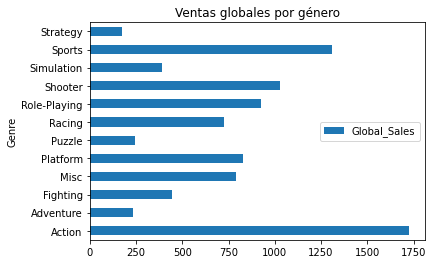

In [ ]:
total_genero.plot(kind='barh', title='Ventas globales por género');

La mayor cantidad de videojuegos vendidos corresponden a los géneros de acción y deportes.

Ahora, ¿cómo podemos observar el comportamiento entre la cantidad de ventas globales y la cantidad de videojuegos?

Tenemos los DataFrames que creamos, num_genero y total_genero, vamos a unirlos y luego crearemos un diagrama de dispersión mediante el cual observaremos cómo varia la cantidad de ventas a partir de la cantidad de videojuegos por género.

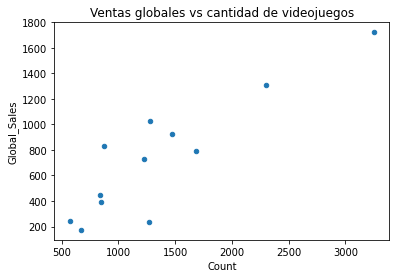

In [ ]:
ventas_cantidad = num_genero.merge(total_genero,left_on='Genre', right_on='Genre')

ventas_cantidad.plot(kind='scatter', x='Count', y='Global_Sales',
                     title='Ventas globales vs cantidad de videojuegos');

De este gráfico podemos notar que las ventas si pueden variar de acuerdo a las cantidades de videojuegos que se creen.

Ahora, ¿en qué años se vendieron más videojuegos?

## Cantidad de Ventas por años en todo el mundo

Para calcular esta cantidad y visualizarla en el gráfico, primero debemos hacer una tabla pivote donde nuestro índice sean los años y los valores correspondan a las ventas en esos años en todo el mundo es decir, las ventas globales.

In [ ]:
table_year = df.pivot_table(index='Year', values='Global_Sales', 
                            aggfunc={'Global_Sales':sum})
table_year

,Global_Sales
Year,
1980-01-01,11.38
1981-01-01,35.77
1982-01-01,28.86
1983-01-01,16.79
1984-01-01,50.36
1985-01-01,53.94
1986-01-01,37.07
1987-01-01,21.74
1988-01-01,47.22


Esto mismo pero ahora de forma gráfica

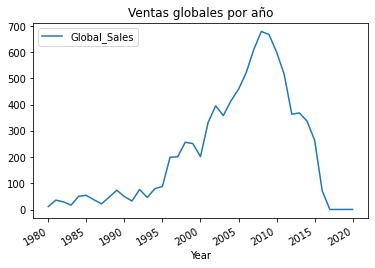

In [ ]:
table_year.plot(title='Ventas globales por año');

Aquí notamos que existe un valor bastante pronunciado, te puedes preguntar cómo determinamos con exactitud ese valor sin mirar con detenimiento la tabla.

Podemos utilizar nuevamente `idxmax`, recordemos nos devuelve la posición del máximo de los datos seleccionados o, como en este caso, el índice.

In [ ]:
table_year.idxmax()

Global_Sales   2008-01-01
dtype: datetime64[ns]

Observamos que para 2008 hubo la mayor cantidad de ventas.

Estudiemos este año creando una consulta y luego veamos la cantidad de videojuegos lanzados al mercado por género.

In [ ]:
datos2008 = df.query('Year == 2008')
datos2008.groupby('Genre').count()[['Name']].sort_values(by='Name', ascending=False)

,Name
Genre,
Action,221
Misc,212
Sports,200
Adventure,166
Simulation,119
Role-Playing,112
Shooter,83
Racing,82
Puzzle,64


La mayor cantidad de videojuegos vendidos en 2008 correspondió al género de acción.

💡 Si colocas el nombre de la variable entre corchetes obtedremos una serie pero si lo colocamos dentro de dos pares de corchetes (`[['nombre_variable']]`) se obtendrá un DataFrame.

Ahora pasemos a revisar la cantidad de ventas por regiones.

## Cantidad de ventas por regiones

Para este caso podemos acceder a las columnas correspondientes y sumar sus valores para obtener el resultado de la venta total por regiones.

In [ ]:
regiones = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

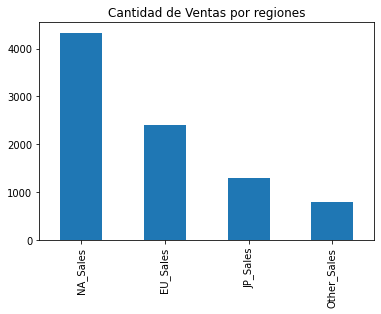

In [ ]:
regiones.sum().plot(kind='bar', title='Cantidad de Ventas por regiones');

#### ¿Cómo han sido las ventas por regiones a lo largo de los años?

Para conocer esto vamos a realizar una tabla pivote, esta tabla debe tener los años en el índice y para cada una de las regiones se debe tener la cantidad de ventas en millones (sumar las ventas que corresponden).

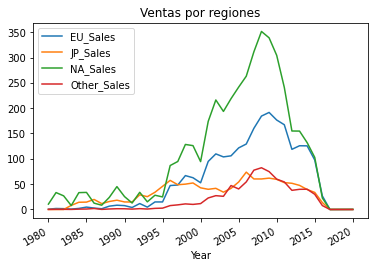

In [ ]:
regiones_year = df.pivot_table(index='Year',
                               values=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                               aggfunc={'NA_Sales':sum, 'EU_Sales':sum,
                                        'JP_Sales':sum, 'Other_Sales':sum}
                               )
regiones_year.plot(title='Ventas por regiones');

Esto también lo podemos ver de forma individual para cada caso

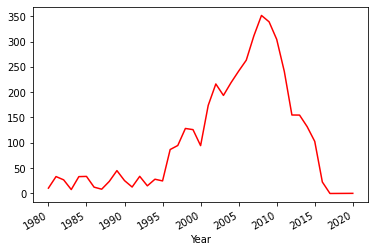

In [ ]:
regiones_year.NA_Sales.plot(colormap='autumn', 
                            title='Ventas anuales para Norteamérica');

Ahora, pasemos a ver la cantidad de ventas por plataformas.

#### ¿Qué plataforma ha vendido más?

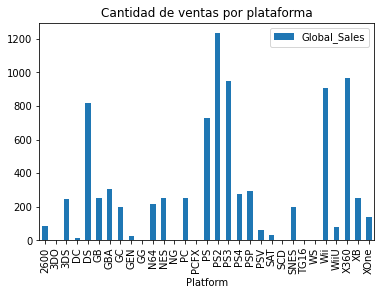

In [ ]:
plataforma = df.pivot_table(index=['Platform'],  values='Global_Sales', aggfunc={'Global_Sales':sum})

plataforma.plot(kind='bar',
                title='Cantidad de ventas por plataforma');

La mayor cantidad de ventas las ha hecho la plataforma PS2. Para esta plataforma los géneros se distribuyen de la siguiente manera:

Haremos un gráfico de torta/pie pero antes debemos hacer una consulta de los datos que correspondan a la plataforma PS2 y luego una tabla pivote por los géneros.

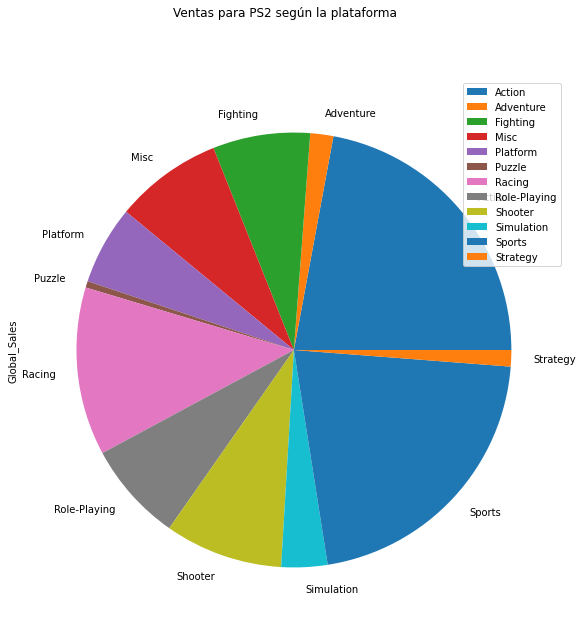

In [ ]:
ps2_genero = df.query("Platform == 'PS2'").pivot_table(index='Genre',
                                          aggfunc={'Global_Sales':sum})

ps2_genero.plot(kind='pie',
                subplots=True,
                title='Ventas para PS2 según la plataforma',
                figsize=(10, 10));

Ahora, veamos las ventas por editor y de allí determinemos ¿Cuál es el que ha vendido más?

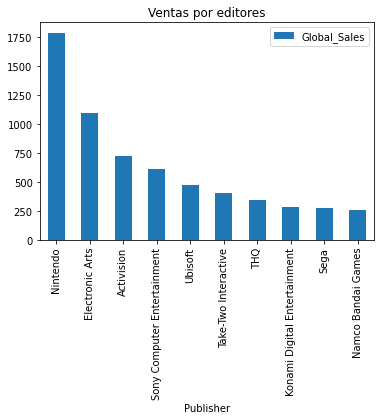

In [ ]:
editores = df.pivot_table(aggfunc={'Global_Sales':sum},
                          index='Publisher').sort_values('Global_Sales', ascending=False)[:10]
editores.plot(kind='bar', 
              title='Ventas por editores');

Nintendo es el editor o empresa que tiene mayor cantidad de ventas. 

Veamos cómo es su comportamiento a lo largo de los años. Esto lo podemos ver en un gráfico de líneas. Vamos a crearlo a partir de una tabla que contenga solo la información correspondiente a este editor, ordenada por años junto con la cantidad de ventas total.

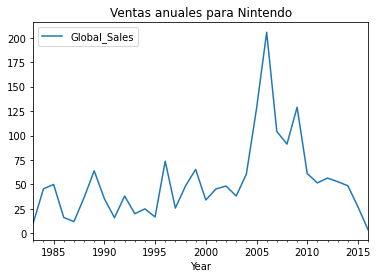

In [ ]:
nintendo_anual = df.query("Publisher == 'Nintendo'").pivot_table(
    index='Year', aggfunc={'Global_Sales':sum})

nintendo_anual.plot(title='Ventas anuales para Nintendo');

In [ ]:
nintendo_anual.idxmax()

Global_Sales   2006-01-01
dtype: datetime64[ns]

El punto más alto de las ventas para Nintendo fue en el año 2006. Veamos cuáles fueron las ventas por plataformas en ese año

In [ ]:
pico = df.query("Publisher == 'Nintendo' and Year == 2006").pivot_table(index='Platform', aggfunc={'Global_Sales':sum})

pico.query('Global_Sales > 0')

,Global_Sales
Platform,
DS,77.75
GBA,1.30
GC,1.70
Wii,124.86


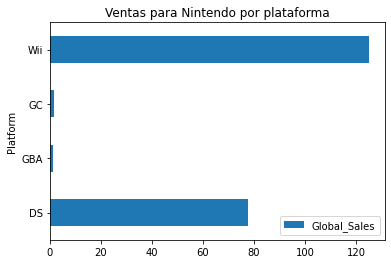

In [ ]:
pico.query('Global_Sales > 0').plot(kind='barh',
                                    title='Ventas para Nintendo por plataforma');

La mayor cantidad de ventas por Nintendo corresponde a la plataforma Wii. Ahora nos podemos preguntar, ¿qué género es el más común? en el 2006 para Nintendo

In [19]:
genero_ = df.query("Publisher == 'Nintendo' and Year == 2006").pivot_table(index='Genre', aggfunc={'Global_Sales':sum})

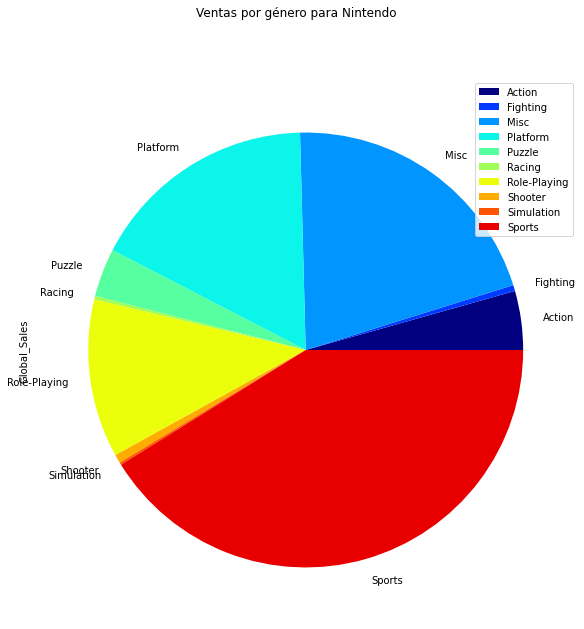

In [20]:
genero_.plot(kind='pie', subplots=True,
             figsize=(10,10), colormap='jet',
             title='Ventas por género para Nintendo');

Hay muchas categórías es mejor verlo en un gráfico de barras.

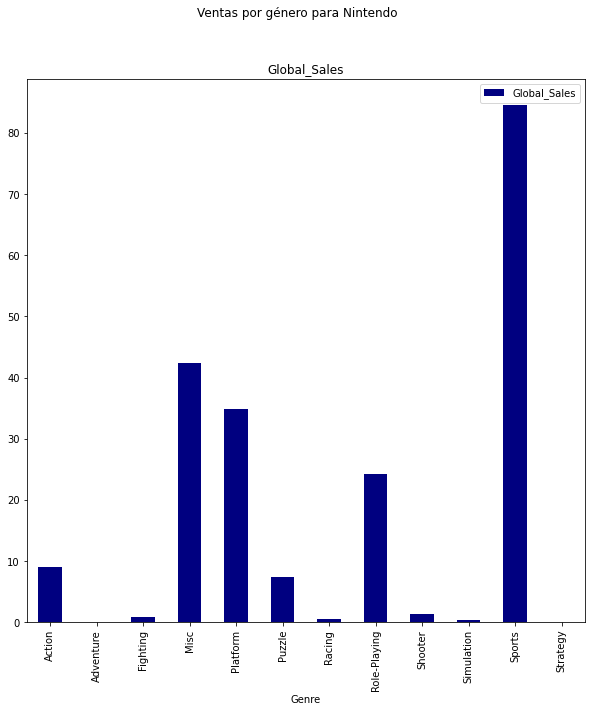

In [21]:
genero_.plot(kind='bar', subplots=True,
             figsize=(10,10), colormap='jet',
             title='Ventas por género para Nintendo');

In [ ]:
df.query("Publisher == 'Nintendo' and Year == 2006 and Genre=='Sports'")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1136,1138,Mario Hoops 3 on 3,DS,2006-01-01,Sports,Nintendo,0.99,0.04,0.49,0.10,1.62
7080,7082,Super Swing Golf,Wii,2006-01-01,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23
14626,14629,Calcio Bit,GBA,2006-01-01,Sports,Nintendo,0.00,0.00,0.03,0.00,0.03


En esta última tabla podemos observar que Nintendo tuvo sus máximas ventas con el videojuego Wii Sports.

De esto podemos determinar que en general, la mayor cantidad de videojuegos se han creado para el género acción y este ha acumulado la mayor cantidad de ventas. Además, el editor Nintendo es el que más ha producido ventas, sobretodo en la plataforma wii y el videojuego Wii Sports.